# An Introduction to the Scientific Python Ecosystem

While the Python language is an excellent tool for general-purpose programming, with a highly readable syntax, rich and powerful data types (strings, lists, sets, dictionaries, arbitrary length integers, etc) and a very comprehensive standard library, it was not designed specifically for mathematical and scientific computing.  Neither the language nor its standard library have facilities for the efficient representation of multidimensional datasets, tools for linear algebra and general matrix manipulations (an essential building block of virtually all technical computing), nor any data visualization facilities.

In particular, Python lists are very flexible containers that can be nested arbitrarily deep and which can hold any Python object in them, but they are poorly suited to represent efficiently common mathematical constructs like vectors and matrices.  In contrast, much of our modern heritage of scientific computing has been built on top of libraries written in the Fortran language, which has native support for vectors and matrices as well as a library of mathematical functions that can efficiently operate on entire arrays at once.

**Resources**

For Numpy, Matplotlib, SciPy and related tools, these two resources will be particularly useful:

* [Elegant SciPy](http://proquest.safaribooksonline.com/9781491922927), a collection of example-oriented lessons on how to best use the scientific Python toolkit, by the creator of Scikit-Image and BIDS researcher [Stefan van der Walt](https://bids.berkeley.edu/people/st%C3%A9fan-van-der-walt). In addition to the previous O'Reilly reader, the [full book](https://github.com/elegant-scipy/elegant-scipy) as well as all the [notebooks](https://github.com/elegant-scipy/notebooks) are available.

* The [online SciPy Lectures](http://www.scipy-lectures.org), and specifically for this topic, the [NumPy chapter](http://www.scipy-lectures.org/intro/numpy/index.html).

* The [official Numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/index.html).

## Scientific Python: a collaboration of projects built by scientists

The scientific community has developed a set of related Python libraries that provide powerful array facilities, linear algebra, numerical algorithms, data visualization and more.  In this appendix, we will briefly outline the tools most frequently used for this purpose, that make "Scientific Python" something far more powerful than the Python language alone.

For reasons of space, we can only briefly describe the central Numpy library, but below we provide links to the websites of each project where you can read their full documentation in more detail.

First, let's look at an overview of the basic tools that most scientists use in daily research with Python.  The core of this ecosystem is composed of:

* **Numpy:** the basic library that most others depend on, it provides a powerful array type that can represent multidimensional datasets of many different kinds and that supports arithmetic operations. Numpy also provides a library of common mathematical functions, basic linear algebra, random number generation and Fast Fourier Transforms.  Numpy can be found at [numpy.scipy.org](http://numpy.scipy.org)

* **Scipy:** a large collection of numerical algorithms that operate on numpy arrays and provide facilities for many common tasks in scientific computing, including dense and sparse linear algebra, optimization, special functions, statistics, n-dimensional image processing, signal processing and more. Scipy can be found at [scipy.org](http://scipy.org).

* **Matplotlib:** a data visualization library with a strong focus on producing high-quality output, it supports a variety of common scientific plot types in two and three dimensions, with precise control over the final output for publication-quality results.  Matplotlib can also be controlled interactively allowing graphical manipulation of your data (zooming, panning). It can be found at [matplotlib.org](http://matplotlib.org).

* **IPython:** while not restricted to scientific uses, IPython is the interactive environment in which many scientists spend their time when working with the Python language. IPython provides a powerful Python shell that integrates tightly with Matplotlib and with easy access to the files and operating system, as well as components for high-level parallel computing.  It can execute either in a terminal or in a graphical Qt console. IPython also has a web-based notebook interface that can combine code with text, mathematical expressions, figures and multimedia.  It can be found at [ipython.org](http://ipython.org).

While each of these tools can be installed separately, in our experience the most convenient way of accessing them today (especially on Windows and Mac computers) is to install the [Free Edition of the Enthought's Canopy Distribution](http://www.enthought.com/products/epd_free.php)or [Continuum Analytics' Anaconda](http://continuum.io/downloads), both of which contain all the above.  Other free alternatives on Windows (but not on Macs) are [Python(x,y)](http://code.google.com/p/pythonxy) and [ Christoph Gohlke's packages page](http://www.lfd.uci.edu/~gohlke/pythonlibs).

The four 'core' libraries above are in practice complemented by a number of other tools for more specialized work.  We will briefly list here the ones that we think are the most commonly needed:

* **Sympy:** a symbolic manipulation tool that turns a Python session into a computer algebra system.  It integrates with the IPython notebook, rendering results in properly typeset mathematical notation.  [sympy.org](http://sympy.org).

* **Mayavi:** sophisticated 3d data visualization; [code.enthought.com/projects/mayavi](http://code.enthought.com/projects/mayavi).

* **Cython:** a bridge language between Python and C, useful both to optimize performance bottlenecks in Python and to access C libraries directly; [cython.org](http://cython.org).

* **Pandas:** high-performance data structures and data analysis tools, with powerful data alignment and structural manipulation capabilities; [pandas.pydata.org](http://pandas.pydata.org).

* **Statsmodels:** statistical data exploration and model estimation; [statsmodels.sourceforge.net](http://statsmodels.sourceforge.net).

* **Scikit-learn:** general purpose machine learning algorithms with a common interface; [scikit-learn.org](http://scikit-learn.org).

* **Scikits-image:** image processing toolbox; [scikits-image.org](http://scikits-image.org).

* **NetworkX:** analysis of complex networks (in the graph theoretical sense); [networkx.lanl.gov](http://networkx.lanl.gov).

* **PyTables:** management of hierarchical datasets using the industry-standard HDF5 format; [www.pytables.org](http://www.pytables.org).

Beyond these, for any specific problem you should look on the internet first, before starting to write code from scratch.  There's a good chance that someone, somewhere, has written an open source library that you can use for part or all of your problem.

# Motivation: the trapezoidal rule

In subsequent sections we'll provide a basic introduction to the nuts and bolts of the basic scientific python tools; but we'll first motivate it with a brief example that illustrates what you can do in a few lines with these tools.  For this, we will use the simple problem of approximating a definite integral with the trapezoid rule:

$$
\int_{a}^{b} f(x)\, dx \approx \frac{1}{2} \sum_{k=1}^{N} \left( x_{k} - x_{k-1} \right) \left( f(x_{k}) + f(x_{k-1}) \right).
$$

Our task will be to compute this formula for a function such as:

$$
f(x) = (x-3)(x-5)(x-7)+85
$$

integrated between $a=1$ and $b=9$.

First, we define the function and sample it evenly between 0 and 10 at 200 points:

In [1]:
def f(x):
    return (x-3)*(x-5)*(x-7)+85

import numpy as np
x = np.linspace(0, 10, 200)
y = f(x)

We select $a$ and $b$, our integration limits, and we take only a few points in that region to illustrate the error behavior of the trapezoid approximation:

In [9]:
a, b = 1, 9
sampling = 30
xint = x[np.logical_and(x>=a, x<=b)][::sampling]
yint = y[np.logical_and(x>=a, x<=b)][::sampling]
# Fix end points of the interval
xint[0], xint[-1] = a, b
yint[0], yint[-1] = f(a), f(b)

Let's plot both the function and the area below it in the trapezoid approximation:

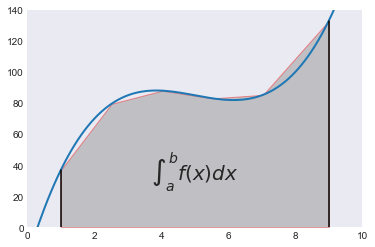

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

plt.plot(x, y, lw=2)
plt.plot([a, a], [0, f(a)], color='black')
plt.plot([b, b], [0, f(b)], color='black')
plt.axis([a-1, b+1, 0, 140])
plt.fill_between(xint, 0, yint, facecolor='gray', edgecolor='red', alpha=.4)
plt.text(0.5 * (a + b), 30,r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20);

Compute the integral both at high accuracy and with the trapezoid approximation

In [19]:
from scipy.integrate import quad, trapz

integral, error = quad(f, a, b)
trap_integral = trapz(yint, xint)
print("The integral is: %g +/- %.1e" % (integral, error))
print("The trapezoid approximation with", len(xint), "points is:", trap_integral)
print("The absolute error is:", abs(integral - trap_integral))

The integral is: 680 +/- 7.5e-12
The trapezoid approximation with 16 points is: 623.008087272
The absolute error is: 56.991912728


This simple example showed us how, combining the numpy, scipy and matplotlib libraries we can provide an illustration of a standard method in elementary calculus with just a few lines of code.  We will now discuss with more detail the basic usage of these tools.

A note on visual styles: matplotlib has a rich system for controlling the visual style of all plot elements. [This page](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html) is a gallery that illustrates how each style choice affects different plot types, which you can use to select the most appropriate to your needs.

# NumPy arrays: the right data structure for scientific computing

## Basics of Numpy arrays

We now turn our attention to the Numpy library, which forms the base layer for the entire 'scipy ecosystem'.  Once you have installed numpy, you can import it as

In [ ]:
import numpy

though in this book we will use the common shorthand

In [ ]:
import numpy as np

As mentioned above, the main object provided by numpy is a powerful array.  We'll start by exploring how the numpy array differs from Python lists.  We start by creating a simple list and an array with the same contents of the list:

In [20]:
lst = [10, 20, 30, 40]
arr = np.array([10, 20, 30, 40])

Elements of a one-dimensional array are accessed with the same syntax as a list:

In [21]:
lst[0]

10

In [22]:
arr[0]

10

In [23]:
arr[-1]

40

In [24]:
arr[2:]

array([30, 40])

The first difference to note between lists and arrays is that arrays are *homogeneous*; i.e. all elements of an array must be of the same type.  In contrast, lists can contain elements of arbitrary type. For example, we can change the last element in our list above to be a string:

In [26]:
lst[-1] = 'a string inside a list'
lst

[10, 20, 30, 'a string inside a list']

but the same can not be done with an array, as we get an error message:

In [27]:
arr[-1] = 'a string inside an array'

ValueError: invalid literal for int() with base 10: 'a string inside an array'

The information about the type of an array is contained in its *dtype* attribute:

In [28]:
arr.dtype

dtype('int64')

Once an array has been created, its dtype is fixed and it can only store elements of the same type.  For this example where the dtype is integer, if we store a floating point number it will be automatically converted into an integer:

In [33]:
arr[-1] = round(-1.99999)
arr

array([10, 20, 30, -2])

Above we created an array from an existing list; now let us now see other ways in which we can create arrays, which we'll illustrate next.  A common need is to have an array initialized with a constant value, and very often this value is 0 or 1 (suitable as starting value for additive and multiplicative loops respectively); `zeros` creates arrays of all zeros, with any desired dtype:

In [34]:
np.zeros(5, float)

array([ 0.,  0.,  0.,  0.,  0.])

In [35]:
np.zeros(3, int)

array([0, 0, 0])

In [36]:
np.zeros(3, complex)

array([ 0.+0.j,  0.+0.j,  0.+0.j])

and similarly for `ones`:

In [37]:
print('5 ones:', np.ones(5))

5 ones: [ 1.  1.  1.  1.  1.]


If we want an array initialized with an arbitrary value, we can create an empty array and then use the fill method to put the value we want into the array:

In [38]:
a = np.empty(4)
a.fill(5.5)
a

array([ 5.5,  5.5,  5.5,  5.5])

This illustrates the internal structure of a Numpy array (taken from the [official Numpy docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.html):

<img src="numpy_object.png", width=60%></img>

Numpy also offers the `arange` function, which works like the builtin `range` but returns an array instead of a list:

In [46]:
np.arange(1, 100, 5)

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

and the `linspace` and `logspace` functions to create linearly and logarithmically-spaced grids respectively, with a fixed number of points and including both ends of the specified interval:

In [49]:
print("A linear grid between 0 and 1:", np.linspace(0, 1, 5))
print("A logarithmic grid between 10**1 and 10**4: ", np.logspace(1, 4, 4))

A linear grid between 0 and 1: [ 0.    0.25  0.5   0.75  1.  ]
A logarithmic grid between 10**1 and 10**4:  [    10.    100.   1000.  10000.]


Finally, it is often useful to create arrays with random numbers that follow a specific distribution.  The `np.random` module contains a number of functions that can be used to this effect, for example this will produce an array of 5 random samples taken from a standard normal distribution (0 mean and variance 1):

In [50]:
np.random.randn(5)

array([-0.48304709,  0.28655456, -0.19265396, -0.88006323,  0.87498999])

whereas this will also give 5 samples, but from a normal distribution with a mean of 10 and a variance of 3:

In [51]:
norm10 = np.random.normal(10, 3, 5)
norm10

array([ 12.56820903,   1.47969901,   6.55535371,   8.19742998,  10.77647217])

## Indexing with other arrays

Above we saw how to index arrays with single numbers and slices, just like Python lists.  But arrays allow for a more sophisticated kind of indexing which is very powerful: you can index an array with another array, and in particular with an array of boolean values.  This is particluarly useful to extract information from an array that matches a certain condition.

Consider for example that in the array `norm10` we want to replace all values above 9 with the value 0.  We can do so by first finding the *mask* that indicates where this condition is true or false:

In [53]:
mask = norm10 > 9
mask

array([ True, False, False, False,  True], dtype=bool)

Now that we have this mask, we can use it to either read those values or to reset them to 0:

In [54]:
print('Values above 9:', norm10[mask])

Values above 9: [ 12.56820903  10.77647217]


In [56]:
print('Resetting all values above 9 to 0...')
norm10[mask] = 9
print(norm10)

Resetting all values above 9 to 0...
[ 9.          1.47969901  6.55535371  8.19742998  9.        ]


## Arrays with more than one dimension

Up until now all our examples have used one-dimensional arrays.  But Numpy can create arrays of aribtrary dimensions, and all the methods illustrated in the previous section work with more than one dimension.  For example, a list of lists can be used to initialize a two dimensional array:

In [57]:
lst2 = [[1, 2], [3, 4]]
arr2 = np.array([[1, 2], [3, 4]])
arr2

array([[1, 2],
       [3, 4]])

With two-dimensional arrays we start seeing the power of numpy: while a nested list can be indexed using repeatedly the `[ ]` operator, multidimensional arrays support a much more natural indexing syntax with a single `[ ]` and a set of indices separated by commas:

In [58]:
print(lst2[0][1])
print(arr2[0,1])

2
2


Most of the array creation functions listed above can be used with more than one dimension, for example:

In [63]:
np.array([[1,2,3],[4,5,6]], order='F')

array([[1, 2, 3],
       [4, 5, 6]])

In [59]:
np.zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [60]:
np.random.normal(10, 3, (2, 4))

array([[  6.89922709,   4.90010716,   8.03676866,   9.42203807],
       [ 11.27772034,  18.23221947,  10.72301157,  12.34453065]])

In fact, the shape of an array can be changed at any time, as long as the total number of elements is unchanged.  For example, if we want a 2x4 array with numbers increasing from 0, the easiest way to create it is:

In [67]:
arr = np.arange(8).reshape(2,4)
print(arr)

[[0 1 2 3]
 [4 5 6 7]]


With multidimensional arrays, you can also use slices, and you can mix and match slices and single indices in the different dimensions (using the same array as above):

In [68]:
print('Slicing in the second row:', arr[1, 2:4])
print('All rows, third column   :', arr[:, 2])

Slicing in the second row: [6 7]
All rows, third column   : [2 6]


If you only provide one index, then you will get an array with one less dimension containing that row:

In [ ]:
print('First row:  ', arr[0])
print('Second row: ', arr[1])

The following provides a visual overview of indexing in Numpy:

<img src="numpy_indexing.png" width=60%>

Now that we have seen how to create arrays with more than one dimension, it's a good idea to look at some of the most useful properties and methods that arrays have.  The following provide basic information about the size, shape and data in the array:

In [69]:
print('Data type                :', arr.dtype)
print('Total number of elements :', arr.size)
print('Number of dimensions     :', arr.ndim)
print('Shape (dimensionality)   :', arr.shape)
print('Memory used (in bytes)   :', arr.nbytes)

Data type                : int64
Total number of elements : 8
Number of dimensions     : 2
Shape (dimensionality)   : (2, 4)
Memory used (in bytes)   : 64


Arrays also have many useful methods, some especially useful ones are:

In [70]:
print('Minimum and maximum             :', arr.min(), arr.max())
print('Sum and product of all elements :', arr.sum(), arr.prod())
print('Mean and standard deviation     :', arr.mean(), arr.std())

Minimum and maximum             : 0 7
Sum and product of all elements : 28 0
Mean and standard deviation     : 3.5 2.29128784748


For these methods, the above operations area all computed on all the elements of the array.  But for a multidimensional array, it's possible to do the computation along a single dimension, by passing the `axis` parameter; for example:

In [71]:
print('For the following array:\n', arr)
print('The sum of elements along the rows is    :', arr.sum(axis=1))
print('The sum of elements along the columns is :', arr.sum(axis=0))

For the following array:
 [[0 1 2 3]
 [4 5 6 7]]
The sum of elements along the rows is    : [ 6 22]
The sum of elements along the columns is : [ 4  6  8 10]


As you can see in this example, the value of the `axis` parameter is the dimension which will be *consumed* once the operation has been carried out.  This is why to sum along the rows we use `axis=0`.  

This can be easily illustrated with an example that has more dimensions; we create an array with 4 dimensions and shape `(3,4,5,6)` and sum along the axis number 2 (i.e. the *third* axis, since in Python all counts are 0-based).  That consumes the dimension whose length was 5, leaving us with a new array that has shape `(3,4,6)`:

In [72]:
np.zeros((3,4,5,6)).sum(2).shape

(3, 4, 6)

Another widely used property of arrays is the `.T` attribute, which allows you to access the transpose of the array:

In [73]:
print('Array:\n', arr)
print('Transpose:\n', arr.T)

Array:
 [[0 1 2 3]
 [4 5 6 7]]
Transpose:
 [[0 4]
 [1 5]
 [2 6]
 [3 7]]


We don't have time here to look at all the methods and properties of arrays, here's a complete list.  Simply try exploring some of these IPython to learn more, or read their description in the full Numpy documentation:

    arr.T             arr.copy          arr.getfield      arr.put           arr.squeeze
    arr.all           arr.ctypes        arr.imag          arr.ravel         arr.std
    arr.any           arr.cumprod       arr.item          arr.real          arr.strides
    arr.argmax        arr.cumsum        arr.itemset       arr.repeat        arr.sum
    arr.argmin        arr.data          arr.itemsize      arr.reshape       arr.swapaxes
    arr.argsort       arr.diagonal      arr.max           arr.resize        arr.take
    arr.astype        arr.dot           arr.mean          arr.round         arr.tofile
    arr.base          arr.dtype         arr.min           arr.searchsorted  arr.tolist
    arr.byteswap      arr.dump          arr.nbytes        arr.setasflat     arr.tostring
    arr.choose        arr.dumps         arr.ndim          arr.setfield      arr.trace
    arr.clip          arr.fill          arr.newbyteorder  arr.setflags      arr.transpose
    arr.compress      arr.flags         arr.nonzero       arr.shape         arr.var
    arr.conj          arr.flat          arr.prod          arr.size          arr.view
    arr.conjugate     arr.flatten       arr.ptp           arr.sort          

In [75]:
np.argmax?

## Excercise: the Trapezoidal rule

**Illustrates**: basic array slicing, functions as first class objects.

In this exercise, you are tasked with implementing the simple trapezoid
rule formula for numerical integration that we illustrated above.


If we denote by $x_{i}$
($i=0,\ldots,n,$ with $x_{0}=a$ and $x_{n}=b$) the abscissas
where the function is sampled, then

$$\int_{a}^{b}f(x)dx\approx\frac{1}{2}\sum_{i=1}^{n}\left(x_{i}-x_{i-1}\right)\left(f(x_{i})+f(x_{i-1})\right).$$

The common case of using equally spaced abscissas with spacing
$h=(b-a)/n$ reads:

$$\int_{a}^{b}f(x)dx\approx\frac{h}{2}\sum_{i=1}^{n}\left(f(x_{i})+f(x_{i-1})\right).$$

One frequently receives the function values already precomputed,
$y_{i}=f(x_{i}),$ so the formula becomes

$$\int_{a}^{b}f(x)dx\approx\frac{1}{2}\sum_{i=1}^{n}\left(x_{i}-x_{i-1}\right)\left(y_{i}+y_{i-1}\right).$$

In this exercise, you'll need to write two functions, `trapz` and
`trapzf`. `trapz` applies the trapezoid formula to pre-computed values,
implementing equation trapz, while `trapzf` takes a function $f$ as
input, as well as the total number of samples to evaluate, and computes the equation above.

Test it and show that it produces correct values for some simple
integrals you can compute analytically or compare your answers against `scipy.integrate.trapz` as above, using our test function $f(x)$.

In [ ]:
# Your code here

## Operating with arrays

Arrays support all regular arithmetic operators, and the numpy library also contains a complete collection of basic mathematical functions that operate on arrays.  It is important to remember that in general, all operations with arrays are applied *element-wise*, i.e., are applied to all the elements of the array at the same time.  Consider for example:

In [ ]:
arr1 = np.arange(4)
arr2 = np.arange(10, 14)
print(arr1, '+', arr2, '=', arr1+arr2)

Importantly, you must remember that even the multiplication operator is by default applied element-wise, it is *not* the matrix multiplication from linear algebra (as is the case in Matlab, for example):

In [ ]:
print(arr1, '*', arr2, '=', arr1*arr2)

While this means that in principle arrays must always match in their dimensionality in order for an operation to be valid, numpy will *broadcast* dimensions when possible.  For example, suppose that you want to add the number 1.5 to `arr1`; the following would be a valid way to do it:

In [ ]:
arr1 + 1.5*np.ones(4)

But thanks to numpy's broadcasting rules, the following is equally valid:

In [ ]:
arr1 + 1.5

In this case, numpy looked at both operands and saw that the first (`arr1`) was a one-dimensional array of length 4 and the second was a scalar, considered a zero-dimensional object. The broadcasting rules allow numpy to:

* *create* new dimensions of length 1 (since this doesn't change the size of the array)
* 'stretch' a dimension of length 1 that needs to be matched to a dimension of a different size.

So in the above example, the scalar 1.5 is effectively:

* first 'promoted' to a 1-dimensional array of length 1
* then, this array is 'stretched' to length 4 to match the dimension of `arr1`.

After these two operations are complete, the addition can proceed as now both operands are one-dimensional arrays of length 4.

This broadcasting behavior is in practice enormously powerful, especially because when numpy broadcasts to create new dimensions or to 'stretch' existing ones, it doesn't actually replicate the data.  In the example above the operation is carried *as if* the 1.5 was a 1-d array with 1.5 in all of its entries, but no actual array was ever created.  This can save lots of memory in cases when the arrays in question are large and can have significant performance implications.

The general rule is: when operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward, creating dimensions of length 1 as needed. Two dimensions are considered compatible when

* they are equal to begin with, or
* one of them is 1; in this case numpy will do the 'stretching' to make them equal.

If these conditions are not met, a `ValueError: frames are not aligned` exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the maximum size along each dimension of the input arrays.

This shows how the broadcasting rules work in several dimensions:

In [ ]:
b = np.array([2, 3, 4, 5])
print(arr, '\n\n+', b , '\n----------------\n', arr + b)

Now, how could you use broadcasting to say add `[4, 6]` along the rows to `arr` above?  Simply performing the direct addition will produce the error we previously mentioned:

In [ ]:
c = np.array([4, 6])
arr + c

According to the rules above, the array `c` would need to have a *trailing* dimension of 1 for the broadcasting to work.  It turns out that numpy allows you to 'inject' new dimensions anywhere into an array on the fly, by indexing it with the special object `np.newaxis`:

In [ ]:
(c[:, np.newaxis]).shape

This is exactly what we need, and indeed it works:

In [ ]:
arr + c[:, np.newaxis]

For the full broadcasting rules, please see the official Numpy docs, which describe them in detail and with more complex examples.

As we mentioned before, Numpy ships with a full complement of mathematical functions that work on entire arrays, including logarithms, exponentials, trigonometric and hyperbolic trigonometric functions, etc.  Furthermore, scipy ships a rich special function library in the `scipy.special` module that includes Bessel, Airy, Fresnel, Laguerre and other classical special functions.  For example, sampling the sine function at 100 points between $0$ and $2\pi$ is as simple as:

In [ ]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

## Linear algebra in numpy

Numpy ships with a basic linear algebra library, and all arrays have a `dot` method whose behavior is that of the scalar dot product when its arguments are vectors (one-dimensional arrays) and the traditional matrix multiplication when one or both of its arguments are two-dimensional arrays:

In [ ]:
v1 = np.array([2, 3, 4])
v2 = np.array([1, 0, 1])
print(v1, '.', v2, '=', v1.dot(v2))

In Python 3.5, the new `@` operator was introduced to represent [matrix multiplication](http://legacy.python.org/dev/peps/pep-0465), at the request of the scientific community. While `np.dot` and the `.dot` method of arrays continue to exist, using `@` tends to produce much more readable code. We will use `@` henceforth in this tutorial. The above line would now read:

In [ ]:
print(v1, '.', v2, '=', v1 @ v2)

Here is a regular matrix-vector multiplication, note that the array `v1` should be viewed as a *column* vector in traditional linear algebra notation; numpy makes no distinction between row and column vectors and simply verifies that the dimensions match the required rules of matrix multiplication, in this case we have a $2 \times 3$ matrix multiplied by a 3-vector, which produces a 2-vector:

In [ ]:
A = np.arange(6).reshape(2, 3)
print(A, 'x', v1, '=', A @ v1)

For matrix-matrix multiplication, the same dimension-matching rules must be satisfied, e.g. consider the difference between $A \times A^T$:

In [ ]:
print(A @ A.T)

and $A^T \times A$:

In [ ]:
print(A.T @ A)

Furthermore, the `numpy.linalg` module includes additional functionality such as determinants, matrix norms, Cholesky, eigenvalue and singular value decompositions, etc.  For even more linear algebra tools, `scipy.linalg` contains the majority of the tools in the classic LAPACK libraries as well as functions to operate on sparse matrices.  We refer the reader to the Numpy and Scipy documentations for additional details on these.

## Reading and writing arrays to disk

Numpy lets you read and write arrays into files in a number of ways.  In order to use these tools well, it is critical to understand the difference between a *text* and a *binary* file containing numerical data.  In a text file, the number $\pi$ could be written as "3.141592653589793", for example: a string of digits that a human can read, with in this case 15 decimal digits.  In contrast, that same number written to a binary file would be encoded as 8 characters (bytes) that are not readable by a human but which contain the exact same data that the variable `pi` had in the computer's memory.  

The tradeoffs between the two modes are thus:

* Text mode: occupies more space, precision can be lost (if not all digits are written to disk), but is readable and editable by hand with a text editor.  Can *only* be used for one- and two-dimensional arrays.

* Binary mode: compact and exact representation of the data in memory, can't be read or edited by hand.  Arrays of any size and dimensionality can be saved and read without loss of information.

First, let's see how to read and write arrays in text mode.  The `np.savetxt` function saves an array to a text file, with options to control the precision, separators and even adding a header:

In [ ]:
arr = np.arange(10).reshape(2, 5)
np.savetxt('test.out', arr, fmt='%.2e', header="My dataset")
!cat test.out

And this same type of file can then be read with the matching `np.loadtxt` function:

In [ ]:
arr2 = np.loadtxt('test.out')
print(arr2)

For binary data, Numpy provides the `np.save` and `np.savez` routines.  The first saves a single array to a file with `.npy` extension, while the latter can be used to save a *group* of arrays into a single file with `.npz` extension.  The files created with these routines can then be read with the `np.load` function.

Let us first see how to use the simpler `np.save` function to save a single array:

In [ ]:
np.save('test.npy', arr2)
# Now we read this back
arr2n = np.load('test.npy')
# Let's see if any element is non-zero in the difference.
# A value of True would be a problem.
print('Any differences?', np.any(arr2-arr2n))

Now let us see how the `np.savez` function works.  You give it a filename and either a sequence of arrays or a set of keywords.  In the first mode, the function will auotmatically name the saved arrays in the archive as `arr_0`, `arr_1`, etc:

In [ ]:
np.savez('test.npz', arr, arr2)
arrays = np.load('test.npz')
arrays.files

Alternatively, we can explicitly choose how to name the arrays we save:

In [ ]:
np.savez('test.npz', array1=arr, array2=arr2)
arrays = np.load('test.npz')
arrays.files

The object returned by `np.load` from an `.npz` file works like a dictionary, though you can also access its constituent files by attribute using its special `.f` field; this is best illustrated with an example with the `arrays` object from above:

In [ ]:
print('First row of first array:', arrays['array1'][0])
# This is an equivalent way to get the same field
print('First row of first array:', arrays.f.array1[0])

This `.npz` format is a very convenient way to package compactly and without loss of information, into a single file, a group of related arrays that pertain to a specific problem.  At some point, however, the complexity of your dataset may be such that the optimal approach is to use one of the standard formats in scientific data processing that have been designed to handle complex datasets, such as NetCDF or HDF5.  

Fortunately, there are tools for manipulating these formats in Python, and for storing data in other ways such as databases.  A complete discussion of the possibilities is beyond the scope of this discussion, but of particular interest for scientific users we at least mention the following:

* The `scipy.io` module contains routines to read and write Matlab files in `.mat` format and files in the NetCDF format that is widely used in certain scientific disciplines.

* For manipulating files in the HDF5 format, there are two excellent options in Python: The PyTables project offers a high-level, object oriented approach to manipulating HDF5 datasets, while the h5py project offers a more direct mapping to the standard HDF5 library interface.  Both are excellent tools; if you need to work with HDF5 datasets you should read some of their documentation and examples and decide which approach is a better match for your needs.

# High quality data visualization with Matplotlib

The [matplotlib](http://matplotlib.sf.net) library is a powerful tool capable of producing complex publication-quality figures with fine layout control in two and three dimensions; here we will only provide a minimal self-contained introduction to its usage that covers the functionality needed for the rest of the book.  We encourage the reader to read the tutorials included with the matplotlib documentation as well as to browse its extensive gallery of examples that include source code.

Just as we typically use the shorthand `np` for Numpy, we will use `plt` for the `matplotlib.pyplot` module where the easy-to-use plotting functions reside (the library contains a rich object-oriented architecture that we don't have the space to discuss here):

In [ ]:
import matplotlib.pyplot as plt

The most frequently used function is simply called `plot`, here is how you can make a simple plot of $\sin(x)$ for $x \in [0, 2\pi]$ with labels and a grid (we use the semicolon in the last line to suppress the display of some information that is unnecessary right now):

In [ ]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
plt.figure()
plt.plot(x,y, label='sin(x)')
plt.legend()
plt.grid()
plt.title('Harmonic')
plt.xlabel('x')
plt.ylabel('y');

You can control the style, color and other properties of the markers, for example:

In [ ]:
plt.plot(x, y, linewidth=2);

In [ ]:
plt.plot(x, y, 'o', markersize=5, color='r');

We will now see how to create a few other common plot types, such as a simple error plot:

In [ ]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y");

A simple log plot

In [ ]:
x = np.linspace(-5, 5)
y = np.exp(-x**2)
plt.semilogy(x, y);

A histogram annotated with text inside the plot, using the `text` function:

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# This will put a text fragment at the position given:
plt.text(55, .027, r'$\mu=100,\ \sigma=15$', fontsize=14)
plt.axis([40, 160, 0, 0.03])
plt.grid()

## Image display

The `imshow` command can display single or multi-channel images.  A simple array of random numbers, plotted in grayscale:

In [ ]:
from matplotlib import cm

plt.imshow(np.random.rand(5, 10), cmap=cm.gray, interpolation='nearest');

A real photograph is a multichannel image, `imshow` interprets it correctly:

In [ ]:
img = plt.imread('stinkbug.png')
print('Dimensions of the array img:', img.shape)
plt.imshow(img);

## Simple 3d plotting with matplotlib

Note that you must execute at least once in your session:

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

One this has been done, you can create 3d axes with the `projection='3d'` keyword to `add_subplot`:

    fig = plt.figure()
    fig.add_subplot(<other arguments here>, projection='3d')

A simple surface plot:

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01);